# Using SOM on Turkey Earthquake

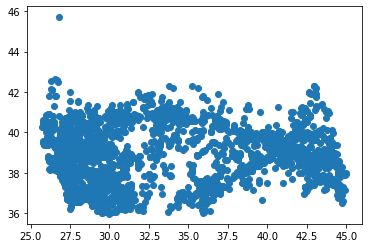

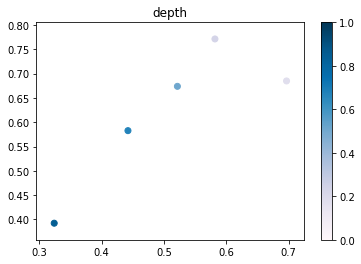

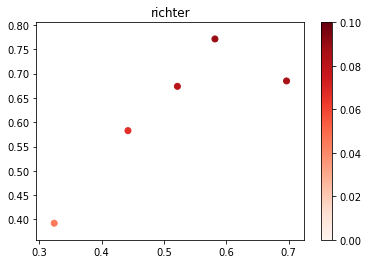

[162, 291, 1808, 2243, 576, 0, 0, 0]
162


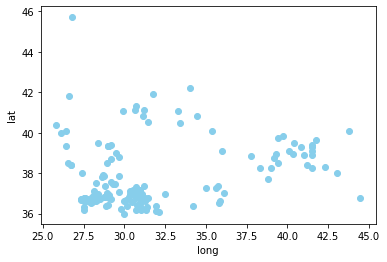

291


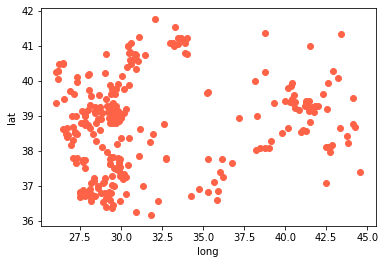

1808


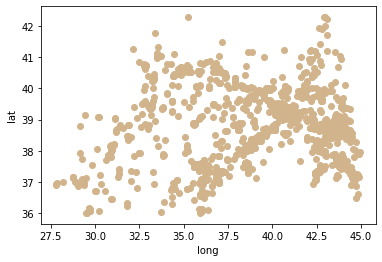

2243


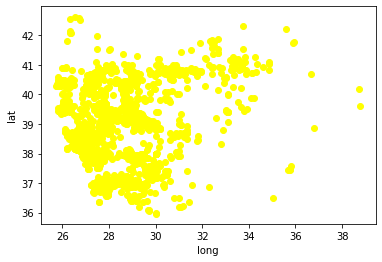

576


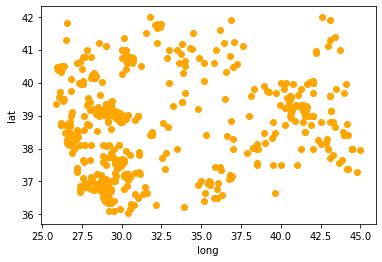

162


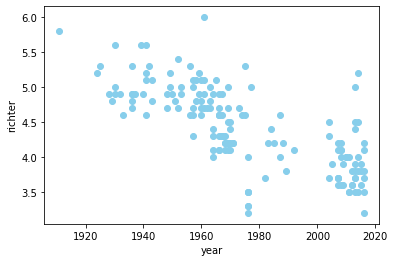

291


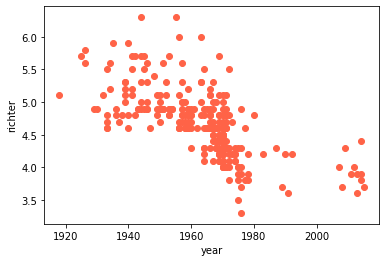

1808


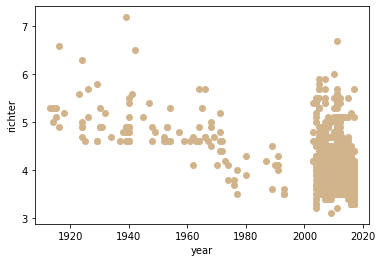

2243


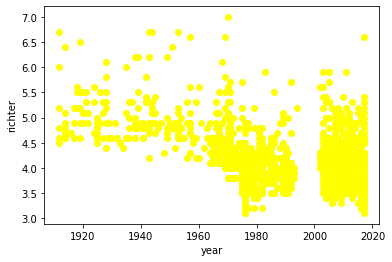

576


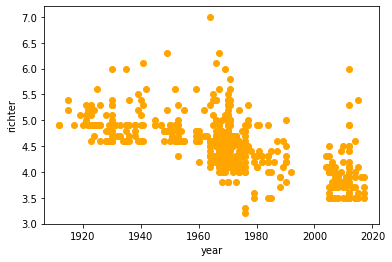

162


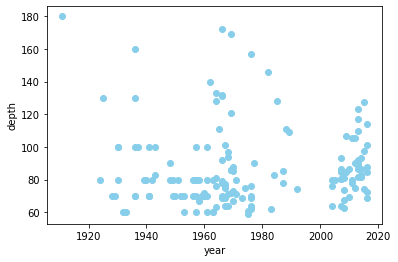

291


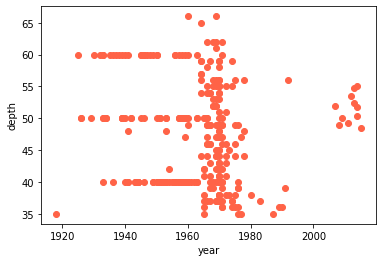

1808


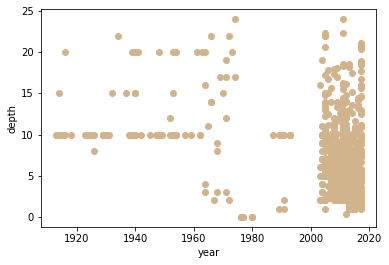

2243


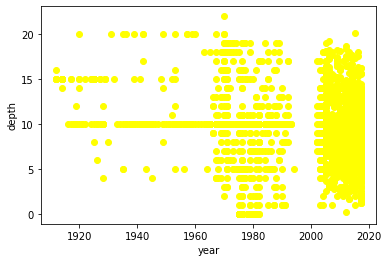

576


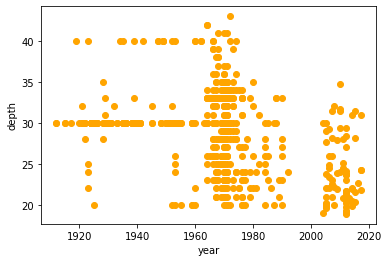

162


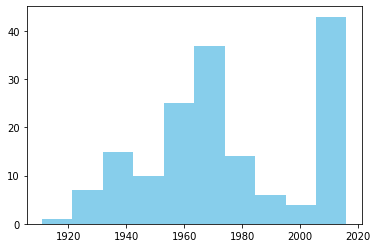

291


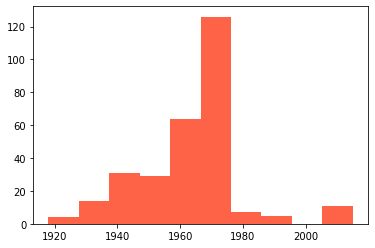

1808


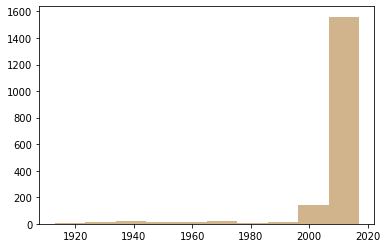

2243


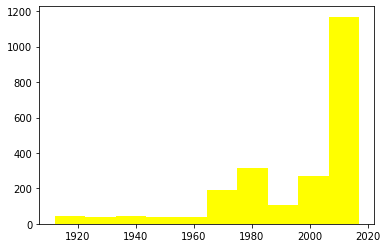

576


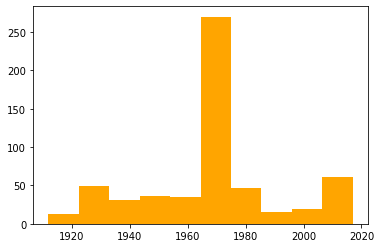

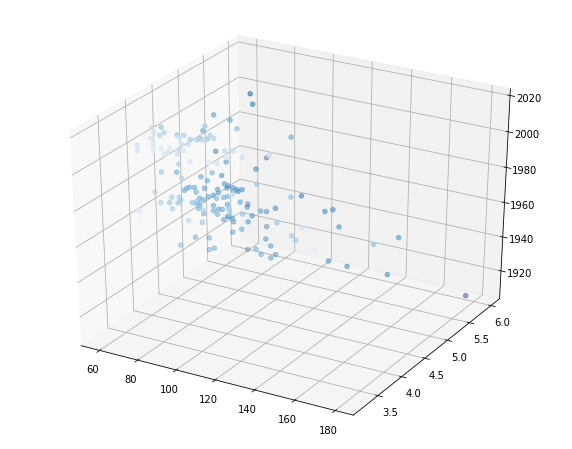

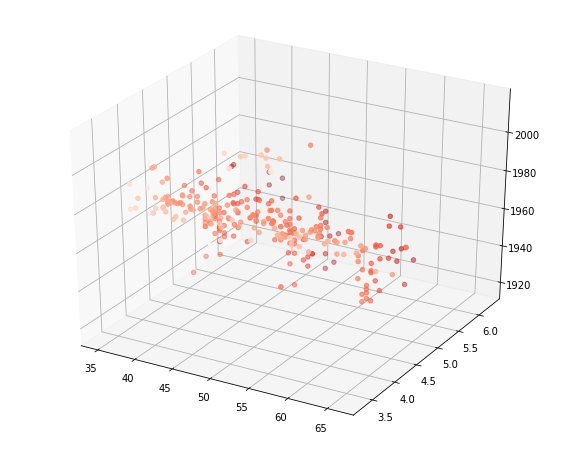

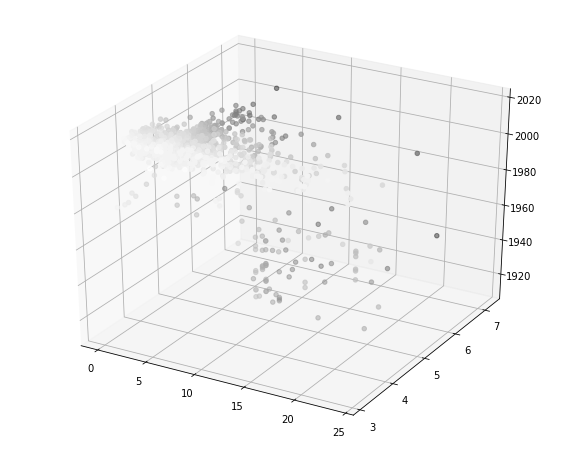

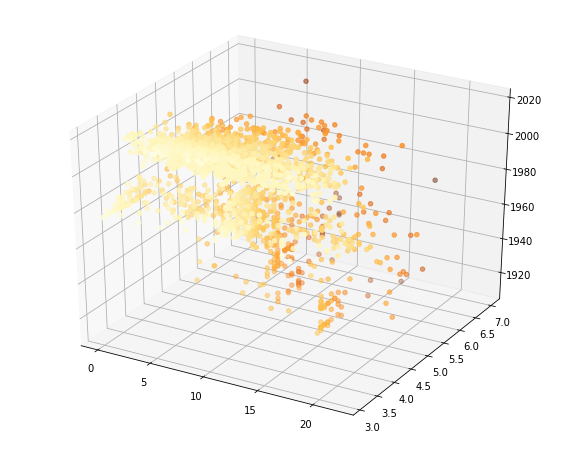

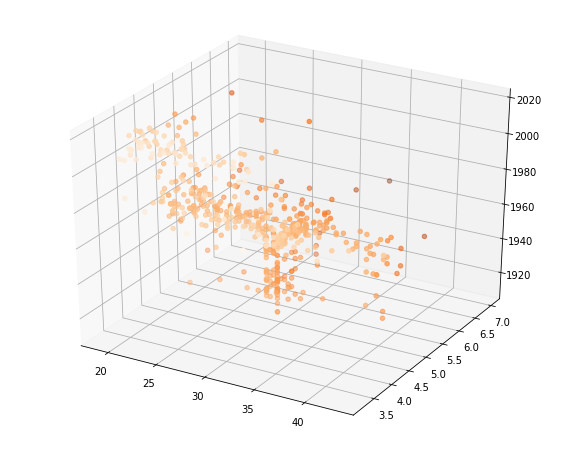

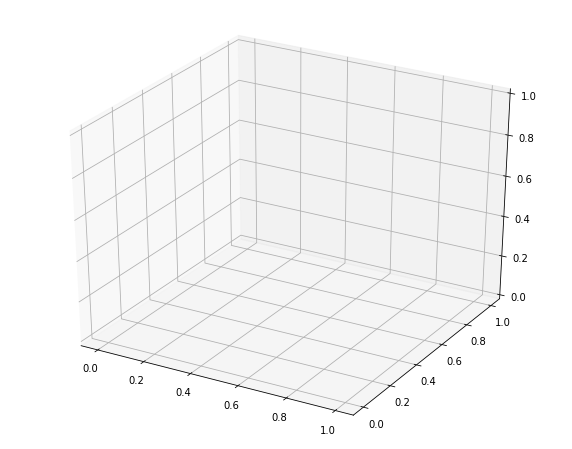

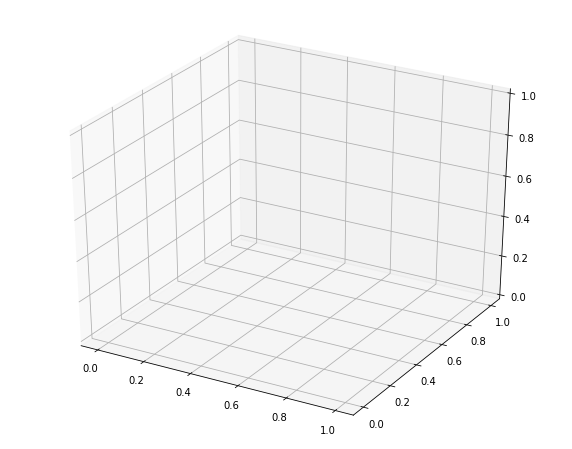

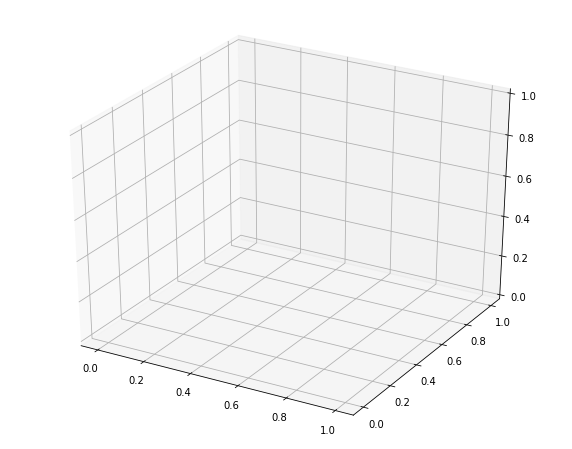

In [7]:

from minisom import MiniSom
import pandas as pd
import math as m
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import style


data = pd.read_csv('data.csv')
year = data.iloc[:,0:1].values
long = data.iloc[:,3:4].values
lat = data.iloc[:,4:5].values
depth = data.iloc[:,10:11].values
richter = data.iloc[:,13:14].values

plt.scatter(long,lat)
plt.show()

train = np.concatenate((long,lat,depth,richter),axis=1)
train = [[float(each) for each in item] for item in train]

norm = []
train_list = []

for i in range(len(train)):
    normalize = train[i][0] * train[i][0] + train[i][1] * train[i][1] + train[i][2] * train[i][2] + train[i][3] * train[i][3]
    normalize = m.sqrt(normalize)
    norm = [train[i][0]/normalize,train[i][1]/normalize,train[i][2]/normalize,train[i][3]/normalize]
    train_list.append(norm)


som = MiniSom(7, 7, 4,sigma = 0.3 ,learning_rate = 0.3)

som.train_batch(train_list, 1000)

result1 = som.activation_response(train_list)
weights = som.get_weights()
#print('Activate Perceptrons are:\n', result1)
#print('Show weight:\n',weights)

result1 = [[float(each) for each in item] for item in result1]
weights = [[[float(each) for each in x]  for x in item] for item in weights ]

#print(result1)
#print(weights)

location = []

for i in range(7):
    for j in range(7):
        if result1[i][j] > 0 :
            location.append([i,j])


wei_location = []

for i in range(len(location)):
    a = location[i][0]
    b = location[i][1]
    wei_location.append(weights[a][b])

#print(wei_location)

som_long = []
som_lat = []
som_depth = []
som_richter = []
for x in range(len(wei_location)):
    som_long.append(wei_location[x][0])
for y in range(len(wei_location)):
    som_lat.append(wei_location[y][1])
for d in range(len(wei_location)):
    som_depth.append(wei_location[d][2])
for r in range(len(wei_location)):
    som_richter.append(wei_location[r][3])
    
def somresult():
    cm = plt.cm.get_cmap('PuBu')
    sc = plt.scatter(som_long,som_lat,c = som_depth, vmin = 0 , vmax = 1,cmap = cm)
    plt.colorbar(sc)
    plt.title('depth')
    plt.show()
    
    cm2 = plt.cm.get_cmap('Reds')
    sc2 = plt.scatter(som_long,som_lat,c = som_richter, vmin = 0 , vmax = 0.1,cmap = cm2)
    plt.colorbar(sc2)
    plt.title('richter')
    plt.show()

somresult()
#cluster.append([d1,d2,d3,d4,d5,d6].index(min([d1,d2,d3,d4,d5,d6])))

cluster = []

for each in train_list:
    compare = []
    for value in wei_location:
        cal = ((each[0]-value[0]) * (each[0]-value[0])) + ((each[1]-value[1]) * (each[1]-value[1])) + ((each[2]-value[2]) * (each[2]-value[2])) +((each[3]-value[3]) * (each[3]-value[3]))
        cal = m.sqrt(cal)
        compare.append(cal)
    for index,value in enumerate(wei_location):
        if min(compare) == compare[index]:
            cluster.append(index)
            
#print(cluster)
class_1 = []
year_1 = []
class_2 = []
year_2 = []
class_3 = []
year_3 = []
class_4 = []
year_4 = []
class_5 = []
year_5 = []
class_6 = []
year_6 = []
class_7 = []
year_7 = []
class_8 = []
year_8 = []
for index,each in enumerate(cluster):
    if each == 0:
        class_1.append(train[index])
        year_1.append(year[index])
    elif each == 1:
        class_2.append(train[index])
        year_2.append(year[index])
    elif each == 2:
        class_3.append(train[index])
        year_3.append(year[index])
    elif each == 3:
        class_4.append(train[index])
        year_4.append(year[index])
    elif each == 4:
        class_5.append(train[index])
        year_5.append(year[index])
    elif each == 5:
        class_6.append(train[index])
        year_6.append(year[index])
    elif each == 6:
        class_7.append(train[index])
        year_7.append(year[index])
    elif each == 7:
        class_8.append(train[index])
        year_8.append(year[index])  
#print(len(class_1),len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7),len(class_8))
group_num = [len(class_1),len(class_2),len(class_3),len(class_4),len(class_5),len(class_6),len(class_7),len(class_8)]
print(group_num)


def plotlonglat(class_num,group_num):
    if len(class_num) > 0:
        class_long = []
        class_lat = []
        for each in class_num:
            class_long.append(each[0])
        for each in class_num:
            class_lat.append(each[1])
            
        if len(class_num) == group_num[0]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='skyblue')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[1]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='tomato')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[2]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='tan')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[3]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='yellow')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[4]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='orange')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[5]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='pink')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[6]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='limegreen')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        elif len(class_num) == group_num[7]:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='plum')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
        else:
            print(len(class_num))
            plt.scatter(class_long,class_lat,c='lightgray')
            plt.xlabel('long')
            plt.ylabel('lat')
            plt.show()
    else:
        return False

plotlonglat(class_1,group_num)
plotlonglat(class_2,group_num)
plotlonglat(class_3,group_num)
plotlonglat(class_4,group_num)
plotlonglat(class_5,group_num)
plotlonglat(class_6,group_num)
plotlonglat(class_7,group_num)
plotlonglat(class_8,group_num)

def plotrichterdepth(class_num,group_num):
    if len(class_num) > 0:
        class_richter = []
        class_depth = []
        for each in class_num:
            class_richter.append(each[3])
        for each in class_num:
            class_depth.append(each[2])
        if len(class_num) == group_num[0]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='skyblue')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[1]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='tomato')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[2]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='tan')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[3]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='yellow')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[4]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='orange')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[5]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='pink')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[6]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='limegreen')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[7]:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='plum')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()
        else:
            print(len(class_num))
            plt.scatter(class_depth,class_richter,c='lightgray')
            plt.xlabel('depth')
            plt.ylabel('richter')
            plt.show()

    else:
        return False
        
#plotrichterdepth(class_1,group_num)
#plotrichterdepth(class_2,group_num)
#plotrichterdepth(class_3,group_num)
#plotrichterdepth(class_4,group_num)
#plotrichterdepth(class_5,group_num)
#plotrichterdepth(class_6,group_num)
#plotrichterdepth(class_7,group_num)
#plotrichterdepth(class_8,group_num)

def plotyearrichter(class_num,year,group_num):
    if len(class_num) > 0:  
        class_richter = []
        for each in class_num:
            class_richter.append(each[3])       
        if len(class_num) == group_num[0]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='skyblue')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[1]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='tomato')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[2]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='tan')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[3]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='yellow')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[4]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='orange')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[5]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='pink')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[6]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='limegreen')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
        elif len(class_num) == group_num[7]:
            print(len(class_num))
            plt.scatter(year,class_richter,c='plum')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()             
        else:
            print(len(class_num))
            plt.scatter(year,class_richter,c='lightgray')
            plt.xlabel('year')
            plt.ylabel('richter')
            plt.show()
    else:
        return False

plotyearrichter(class_1,year_1,group_num)
plotyearrichter(class_2,year_2,group_num)
plotyearrichter(class_3,year_3,group_num)
plotyearrichter(class_4,year_4,group_num)
plotyearrichter(class_5,year_5,group_num)
plotyearrichter(class_6,year_6,group_num)
plotyearrichter(class_7,year_7,group_num)
plotyearrichter(class_8,year_8,group_num)

def plotyeardepth(class_num,year,group_num):
    if len(class_num) > 0:
        class_depth = []
        for each in class_num:
            class_depth.append(each[2])
            
        if len(class_num) == group_num[0]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='skyblue')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[1]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='tomato')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[2]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='tan')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[3]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='yellow')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[4]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='orange')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[5]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='pink')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[6]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='limegreen')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
        elif len(class_num) == group_num[7]:
            print(len(class_num))
            plt.scatter(year,class_depth,c='plum')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()            
        else:
            print(len(class_num))
            plt.scatter(year,class_depth,c='lightgray')
            plt.xlabel('year')
            plt.ylabel('depth')
            plt.show()
            
    else:
        return False

plotyeardepth(class_1,year_1,group_num)
plotyeardepth(class_2,year_2,group_num)
plotyeardepth(class_3,year_3,group_num)
plotyeardepth(class_4,year_4,group_num)
plotyeardepth(class_5,year_5,group_num)
plotyeardepth(class_6,year_6,group_num)
plotyeardepth(class_7,year_7,group_num)
plotyeardepth(class_8,year_8,group_num)

def countyear(year,group_num):
    if len(year) > 0:
        remove = []
        for each in year:
            remove.append(each[0])  
        if len(year) == group_num[0]:
            print(len(year))
            plt.hist(remove,facecolor = 'skyblue')
            plt.show()
        elif len(year) == group_num[1]:
            print(len(year))
            plt.hist(remove,facecolor = 'tomato')
            plt.show()
        elif len(year) == group_num[2]:
            print(len(year))
            plt.hist(remove,facecolor = 'tan')
            plt.show()
        elif len(year) == group_num[3]:
            print(len(year))
            plt.hist(remove,facecolor = 'yellow')
            plt.show()
        elif len(year) == group_num[4]:
            print(len(year))
            plt.hist(remove,facecolor = 'orange')
            plt.show()
        elif len(year) == group_num[5]:
            print(len(year))
            plt.hist(remove,facecolor = 'pink')
            plt.show()
        elif len(year) == group_num[6]:
            print(len(year))
            plt.hist(remove,facecolor = 'limegreen')
            plt.show()
        elif len(year) == group_num[7]:
            print(len(year))
            plt.hist(remove,facecolor = 'plum')
            plt.show()
        else:
            print(len(year))
            plt.hist(remove,facecolor = 'lightgray')
            plt.show()
            
    else:
        return False
    
countyear(year_1,group_num)
countyear(year_2,group_num)
countyear(year_3,group_num)
countyear(year_4,group_num)
countyear(year_5,group_num)
countyear(year_6,group_num)
countyear(year_7,group_num)
countyear(year_8,group_num)

def threedplot(class_1,year_1,class_2,year_2,class_3,year_3,class_4,year_4,class_5,year_5,class_6,year_6,class_7,year_7,class_8,year_8):
    class_1_richter = []
    class_1_depth = []
    class_2_richter = []
    class_2_depth = []
    class_3_richter = []
    class_3_depth = []
    class_4_richter = []
    class_4_depth = []
    class_5_richter = []
    class_5_depth = []
    class_6_richter = []
    class_6_depth = []
    class_7_richter = []
    class_7_depth = []
    class_8_richter = []
    class_8_depth = []
    
    for each in class_1:
        class_1_richter.append(each[3])
    for each in class_1:
        class_1_depth.append(each[2])
    for each in class_2:
        class_2_richter.append(each[3])
    for each in class_2:
        class_2_depth.append(each[2])
    for each in class_3:
        class_3_richter.append(each[3])
    for each in class_3:
        class_3_depth.append(each[2])
    for each in class_4:
        class_4_richter.append(each[3])
    for each in class_4:
        class_4_depth.append(each[2])
    for each in class_5:
        class_5_richter.append(each[3])
    for each in class_5:
        class_5_depth.append(each[2])
    for each in class_6:
        class_6_richter.append(each[3])
    for each in class_6:
        class_6_depth.append(each[2])
    for each in class_7:
        class_7_richter.append(each[3])
    for each in class_7:
        class_7_depth.append(each[2])
    for each in class_8:
        class_8_richter.append(each[3])
    for each in class_8:
        class_8_depth.append(each[2])

    fig = plt.figure(figsize=(20,16))
    ax1 = fig.add_subplot(111, projection='3d')
    #ax1 = plt.axes(projection='3d')
    print('Green',len(year_1))
    print('Red',len(year_2))
    print('Blue',len(year_3))
    ax1.scatter(class_1_depth, class_1_richter, year_1, c= class_1_richter, cmap='Blues' ,marker = 'o')
    plt.show()
    ax1.scatter(class_2_depth, class_2_richter, year_2, c= class_2_richter, cmap='Reds' , marker = '^')
    plt.show()
    ax1.scatter(class_3_depth, class_3_richter, year_3, c= class_3_richter, cmap='Greys' , marker = 's')
    plt.show()    
    ax1.scatter(class_4_depth, class_4_richter, year_4, c= class_4_richter, cmap='YlOrBr' ,marker = 'o')
    plt.show()
    ax1.scatter(class_5_depth, class_5_richter, year_5, c= class_5_richter, cmap='Oranges' , marker = '^')
    plt.show()
    ax1.scatter(class_6_depth, class_6_richter, year_6, c= class_6_richter, cmap='RdPu' , marker = 's')
    plt.show()
    ax1.scatter(class_7_depth, class_7_richter, year_7, c= class_7_richter, cmap='Greens' ,marker = 'o')
    plt.show()
    ax1.scatter(class_8_depth, class_8_richter, year_8, c= class_8_richter, cmap='Purples' , marker = '^')
    plt.show()
#threedplot(class_1,year_1,class_2,year_2,class_3,year_3,class_4,year_4,class_5,year_5,class_6,year_6,class_7,year_7,class_8,year_8)

def threedplot1(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')

    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Blues' ,marker = 'o')

def threedplot2(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Reds' , marker = 'o')

def threedplot3(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Greys' , marker = 'o')    

def threedplot4(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='YlOrBr' ,marker = 'o')
def threedplot5(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Oranges' , marker = 'o')

def threedplot6(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='RdPu' , marker = 'o') 

def threedplot7(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Greens' ,marker = 'o')  

def threedplot8(class_num,year_num):
    class_richter = []
    class_depth = []

    for each in class_num:
        class_richter.append(each[3])
    for each in class_num:
        class_depth.append(each[2])


    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.scatter(class_depth, class_richter, year_num, c= class_richter, cmap='Purples' , marker = 'o')

threedplot1(class_1,year_1)
threedplot2(class_2,year_2)
threedplot3(class_3,year_3)
threedplot4(class_4,year_4)
threedplot5(class_5,year_5)
threedplot6(class_6,year_6)
threedplot7(class_7,year_7)
threedplot8(class_8,year_8)